In [1]:
# %%javascript
# IPython.OutputArea.auto_scroll_threshold = 9999

In [2]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 40)

# 1.Lecture des données (Fichiers Incidents)

In [4]:
incidents_folder_path: str = r'H:\CollaborativeProjects\DataScientest\Jan24_cds_Pompiers\data\raw\london-fire-brigade-incident-records'

In [5]:
incident_data_from_2009_to_2017 = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2009 - 2017.csv"),
                                            date_format='%d-%b-%y',
                                            parse_dates=['DateOfCall'],
                                            dayfirst=True,
                                            sep=",")

incident_data_from_2018_to_onwards = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2018 onwards.csv"),
                                                date_format='%d-%b-%y',
                                                parse_dates=['DateOfCall'],
                                                dayfirst=True,
                                                sep=",",
                                                encoding='unicode_escape')

C:\Users\courio\AppData\Local\Temp\ipykernel_3324\2947356504.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_data_from_2009_to_2017 = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2009 - 2017.csv"),


In [6]:
# vérifier si nous avons le même nombre de colonnes pour le merge.
coluns_intersect: int = len((set(incident_data_from_2009_to_2017.columns) & set(incident_data_from_2018_to_onwards.columns)))
if(len(incident_data_from_2009_to_2017.columns) == len(incident_data_from_2018_to_onwards.columns) 
   and coluns_intersect == len(incident_data_from_2009_to_2017.columns)):
    print("Nous avons le même nombre de colonnes.")

# Concatenons les 2 DataFrames verticalement.
incidents_df = pd.concat([incident_data_from_2009_to_2017, incident_data_from_2018_to_onwards], axis=0)
incidents_df.head()

Nous avons le même nombre de colonnes.


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.0,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.0,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,NaN,NaN,E09000022,LAMBETH,Lambeth,E05014118,Waterloo & South Bank,Waterloo & South Bank,530485.0,179007.0,530450,179050,51.494957,-0.121712,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.0,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.0,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.0,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0


### Acronyms

In [7]:
metadata = pd.read_excel(os.path.join(incidents_folder_path, "Metadata.xlsx"), usecols=['Column', 'Description2']).rename(columns={'Column': 'Variable', 'Description2': 'Description'})
display(metadata)

,Variable,Description
0,IncidentNumber,Numéro d'incident du LFB
1,DateOfCall,Date de l'appel au 999
2,CalYear,Année de l'appel au 999
3,TimeOfCall,Temps de l'appel au 999
4,HourOfCall,Heure de l'appel au 999
5,IncidentGroup,Catégorie d'incident de haut niveau
6,StopCodeDescription,Catégorie d'incident détaillée
7,SpecialServiceType,Détails supplémentaires pour les catégories d'...
8,PropertyCategory,Descripteur de propriété de haut niveau
9,PropertyType,Description détaillé de la propriété


# 2. Exploratory Data Analysis /Analyse exploratoire des données

## Objectif :

#### Analyse de Forme [(voir détails ici)](#) :
- **Variable target** : FirstPumpArriving_AttendanceTime
- **Lignes et colonnes** : 1691361, 39
- **Types de variables** : qualitatives : 20, quantitatives : 19
- **Analyse des valeurs manquantes** :

    - Liste des colonnes n'ayant pas de Nan à la 1ere analyse : **['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall','IncidentGroup', 'StopCodeDescription',         'PropertyCategory','PropertyType', 'AddressQualifier', 'Postcode_district','IncGeo_BoroughCode', 'IncGeo_BoroughName', 'ProperCase','Easting_rounded', 'Northing_rounded', 'FRS', 'PumpCount','PumpMinutesRounded', 'Notional Cost (£)', 'MonthOfCall']**

    - Il y'a **19** variables qui ont des valeurs NaN.
        - Liste des colonnnes ayant plus de 49% de Nan : **['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m','Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime','SecondPumpArriving_DeployedFromStation']**
        - Les valeurs nulles de colonnes **FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,NumCalls** sont remplacées par leur mode         
        
    - Il faudra checker le cas DateOfCall avec les NaN

#### Analyse de Fond :
- **Visualisation de la target** :
    - La variable cible **FirstPumpArriving_AttendanceTime** contient des NaN (On checkera si on peut remplir les NaN plus tard) ou les supprimer les lignes.
    
- **Traitement sur les colonnes**
    - Suppression des colonnes ayannt beaucoupt de valeurs nulles : **['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m','Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation']**
    - Suppression des colonnes n'ayant pas d'impact sur le dataset : **['UPRN', 'USRN','IncGeo_WardCode','IncGeo_WardName','IncGeo_WardNameNew','FirstPumpArriving_DeployedFromStation']**
    - 
    - Le type de la colonne **DateOfCall**  et **TimeOfCall** a été changée en Datetime
- **Signification des variables** :
    -  variables continues standardisées, skewed (asymétriques), test sanguin
    - age quantile : difficile d'interpreter ce graphique, clairement ces données ont été traitées, on pourrait penser 0-5, mais cela pourrait aussi etre une transformation mathématique. On peut pas savoir car la personne qui a mit ce dataset ne le précise nul part. Mais ca n'est pas tres important
    - variable qualitative : binaire (0, 1), viral, Rhinovirus qui semble tres élevée

- **Relation Variables catégorielles / Target** :
    - target / blood : les taux de Monocytes, Platelets, Leukocytes semblent liés au covid-19 -> hypothese a tester
    - target/age : les individus de faible age sont tres peu contaminés ? -> attention on ne connait pas l'age, et on ne sait pas de quand date le dataset (s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes). En revanche cette variable pourra etre intéressante pour la comparer avec les résultats de tests sanguins
    - target / viral : les doubles maladies sont tres rares. Rhinovirus/Enterovirus positif - covid-19 négatif ? -> hypothese a tester ? mais il est possible que la région est subie une épidémie de ce virus. De plus on peut tres bien avoir 2 virus en meme temps. Tout ca n'a aucun lien avec le covid-19


- **Relation Variables continuess / Target** :
    - target / blood : les taux de Monocytes, Platelets, Leukocytes semblent liés au covid-19 -> hypothese a tester
    - target/age : les individus de faible age sont tres peu contaminés ? -> attention on ne connait pas l'age, et on ne sait pas de quand date le dataset (s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes). En revanche cette variable pourra etre intéressante pour la comparer avec les résultats de tests sanguins
    - target / viral : les doubles maladies sont tres rares. Rhinovirus/Enterovirus positif - covid-19 négatif ? -> hypothese a tester ? mais il est possible que la région est subie une épidémie de ce virus. De plus on peut tres bien avoir 2 virus en meme temps. Tout ca n'a aucun lien avec le covid-19
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - blood_data / blood_data : certaines variables sont tres corrélées : +0.9 (a suveiller plus tard)
    - blood_data / age : tres faible corrélation entre age et taux sanguins
    - viral / viral : influenza rapid test donne de mauvais résultats, il fauda peut-etre la laisser tomber
    - relation maladie / blood data : Les taux sanguins entre malades et covid-19 sont différents
    - relation hospitalisation / est malade : 
    - relation hospitalisation / blood : intéressant dans le cas ou on voudrait prédire dans quelle service un patient devrait aller


- **NaN analyse** : viral : 1350(92/8), blood : 600(87/13), both : 90
    

### 2.1 Analyse de la forme des données

In [8]:
incidents_df.shape

(1691361, 39)

Ce dataset **incidents** après merge contient **1691361 lignes et 39 colonnes**

In [9]:
display(incidents_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1691361 entries, 0 to 703081
Data columns (total 39 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   IncidentNumber                          object        
 1   DateOfCall                              datetime64[ns]
 2   CalYear                                 int64         
 3   TimeOfCall                              object        
 4   HourOfCall                              int64         
 5   IncidentGroup                           object        
 6   StopCodeDescription                     object        
 7   SpecialServiceType                      object        
 8   PropertyCategory                        object        
 9   PropertyType                            object        
 10  AddressQualifier                        object        
 11  Postcode_full                           object        
 12  Postcode_district                       object  

None

object            20
float64           11
int64              7
datetime64[ns]     1
Name: count, dtype: int64

<Axes: ylabel='count'>

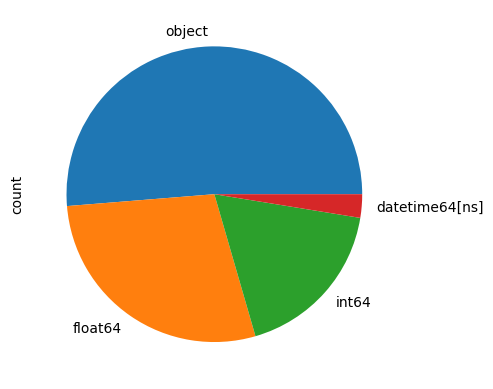

In [10]:
display(incidents_df.dtypes.value_counts())
incidents_df.dtypes.value_counts().plot.pie()

In [11]:
# Analyse descriptive des variables continue.
incidents_df.select_dtypes(exclude=['object']).describe()

,DateOfCall,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
count,1691361,1.691361e+06,1.691361e+06,1.550028e+06,1.528490e+06,853807.000000,853807.000000,1.691361e+06,1.691361e+06,853807.000000,853807.000000,1.559702e+06,604911.000000,1.678254e+06,1.678254e+06,1.691361e+06,1.691361e+06,1.691361e+06,1.689515e+06
mean,2016-08-07 02:19:30.122759680,2.016099e+03,1.347415e+01,2.216739e+10,2.030646e+07,530633.993650,180364.044359,5.306637e+05,1.804959e+05,51.451775,-0.118846,3.180479e+02,394.924834,1.367176e+00,1.554516e+00,1.591760e+00,7.632328e+01,3.974395e+02,1.330867e+00
min,2009-01-01 00:00:00,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,503582.000000,155901.000000,5.035500e+05,1.559500e+05,0.000000,-0.510155,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.550000e+02,1.000000e+00
25%,2012-06-12 00:00:00,2.012000e+03,9.000000e+00,0.000000e+00,2.040096e+07,525198.500000,175988.000000,5.252500e+05,1.761500e+05,51.468933,-0.197280,2.310000e+02,294.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.600000e+02,1.000000e+00
50%,2016-08-21 00:00:00,2.016000e+03,1.400000e+01,0.000000e+00,2.120124e+07,530796.000000,180982.000000,5.309500e+05,1.810500e+05,51.512882,-0.117025,2.960000e+02,368.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,3.280000e+02,1.000000e+00
75%,2020-09-13 00:00:00,2.020000e+03,1.900000e+01,1.001403e+10,2.210116e+07,536833.000000,184935.000000,5.362500e+05,1.851500e+05,51.547736,-0.028804,3.780000e+02,463.000000,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+01,3.520000e+02,1.000000e+00
max,2024-03-31 00:00:00,2.024000e+03,2.300000e+01,2.000044e+11,9.999042e+07,561126.000000,200906.000000,6.111500e+05,3.024500e+05,51.691670,0.322219,1.200000e+03,1200.000000,4.600000e+01,1.060000e+02,9.510000e+02,5.256290e+05,2.277726e+06,3.690000e+02
std,NaN,4.590807e+00,6.246800e+00,4.776722e+10,4.379204e+06,10329.435022,7437.720221,9.721260e+03,7.355635e+03,1.687489,0.148906,1.388444e+02,153.510240,6.774396e-01,8.372198e-01,1.588198e+00,5.765348e+02,2.724155e+03,1.489883e+00


In [12]:
# Analyse descriptive des variables qualitatives.
incidents_df.select_dtypes(include=['object']).describe()

,IncidentNumber,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation
count,1691361.0,1691361,1691361,1691361,544772,1691361,1691361,1691361,853807,1691361,1691361,1691361,1691361,1691057,1691057,1691057,1691361,1691360,1559691,604904
unique,1691361.0,121658,3,10,21,9,292,11,117966,329,33,33,33,899,1484,1481,1,103,117,114
top,235138081.0,19:11:16,False Alarm,AFA,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,SW17 0QT,CR0,E09000033,WESTMINSTER,Westminster,E05013808,West End,West End,London,Soho,Soho,Hammersmith
freq,1.0,56,830352,625944,117098,829837,209574,949359,1805,33017,124791,124791,124791,31431,27583,27583,1691361,60179,52793,15561


In [13]:
incidents_df.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1146589
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              837554
Postcode_district                               0
UPRN                                       141333
USRN                                       162871
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                               304
IncGeo_WardName                               304


**Des valeurs manquantes existent la base de données.**

Liste des colonnes ayant des valeurs manquantes.

In [14]:
#(incidents_df.isna().sum()/incidents_df.shape[0]).sort_values(ascending=True)
def pourcentage_de_valeurs_manquantes(data) -> None:

    nombre_de_lignes = data.shape[0]
    
    for i in range(0, len(data.isna().sum(axis=0))):
        print("Pour la variable", data.isna().sum(axis=0).index[i], "le pourcentage de NaN est de", np.round(data.isna().sum(axis=0)[i]*100/nombre_de_lignes, 2), "%")

        
incidents_df.isna().sum()[incidents_df.isna().sum() > 0 ] / incidents_df.shape[0] * 100.00

SpecialServiceType                        67.790909
Postcode_full                             49.519529
UPRN                                       8.356170
USRN                                       9.629582
IncGeo_WardCode                            0.017974
IncGeo_WardName                            0.017974
IncGeo_WardNameNew                         0.017974
Easting_m                                 49.519529
Northing_m                                49.519529
Latitude                                  49.519529
Longitude                                 49.519529
IncidentStationGround                      0.000059
FirstPumpArriving_AttendanceTime           7.784205
FirstPumpArriving_DeployedFromStation      7.784855
SecondPumpArriving_AttendanceTime         64.235252
SecondPumpArriving_DeployedFromStation    64.235666
NumStationsWithPumpsAttending              0.774938
NumPumpsAttending                          0.774938
NumCalls                                   0.109143
dtype: float

In [15]:
(incidents_df.isna().sum()[incidents_df.isna().sum() / incidents_df.shape[0] > 0.49 ]).index

Index(['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m',
       'Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation'],
      dtype='object')

In [16]:
# Affichage du pourcentage de valeurs manquantes pour chaque variable de la base de données "lieux".
# pourcentage_de_valeurs_manquantes(incidents_df)
print(incidents_df['DateOfCall'].isna().sum())

0


<Axes: >

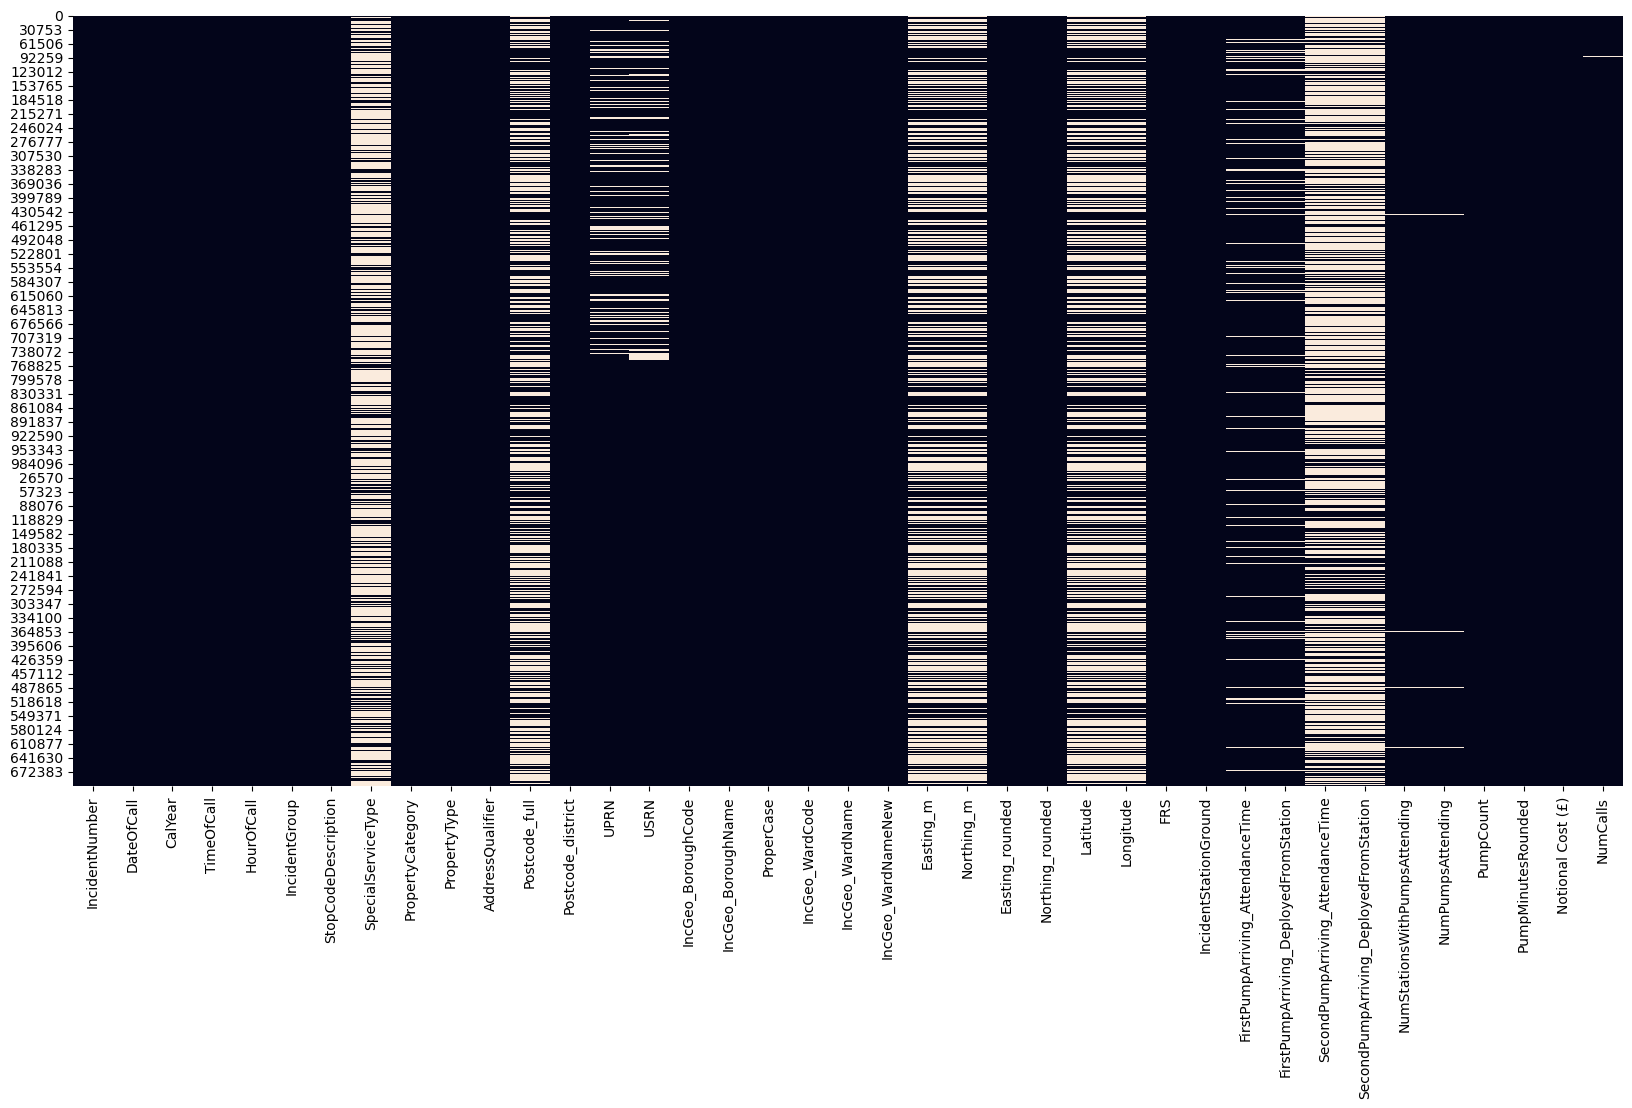

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(incidents_df.isna(), cbar=False)

### 2.2 Analyse du Fond


In [18]:
#from ydata_profiling import ProfileReport
#import ydata-profiling
#london_profile = ProfileReport(incidents_df)

#### 2.2.1 Elimination des colonnes inutiles

Listes des colonnes à supprimer
incidents_df.isna().sum()[incidents_df.isna().sum() > 0 ] / incidents_df.shape[0] * 100.00

**Colonnes ayant beaucoup de valeurs nulles**

- **SpecialServiceType**, contient plus de 67% de valeurs nulles, la colonne  **"StopCodeDescription"** joue déjà le même rôle.
- **Postcode_full** , contient plus de 49% de valeurs nulles, On ne peut pas reconstituer les valeurs nulles,on pourra utiliser la colonne  **"Postcode_district"**.
- **Easting_m** , contient plus de 49% de valeurs nulles
- **Northing_m** , contient plus de 49% de valeurs nulles
- **Latitude** , contient plus de 49% de valeurs nulles.
- **Longitude** , contient plus de 49% de valeurs nulles.
- **SecondPumpArriving_AttendanceTime** , contient plus de 64% de valeurs nulles.
- **SecondPumpArriving_DeployedFromStation** , contient plus de 64% de valeurs nulles.

In [19]:
incidents_df = incidents_df.drop(['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m','Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime','SecondPumpArriving_DeployedFromStation'],axis=1)

In [20]:
# incidents_df.mode().iloc[0]

**Colonnes n'ayant pas d'utilité**

In [21]:
incidents_df = incidents_df.drop(['UPRN', 'USRN','IncGeo_WardCode','IncGeo_WardName','IncGeo_WardNameNew','FirstPumpArriving_DeployedFromStation'],axis=1)

**Suppression des lignes nulles de la colonne car il y'en a pas beaucoup , comparées aus nombre totales de lignes**

In [22]:
incidents_df = incidents_df.dropna(subset=['IncidentStationGround'])

**Columns A Réparer**

- FirstPumpArriving_AttendanceTime           7.784205
- NumStationsWithPumpsAttending              0.774938
- NumPumpsAttending                          0.774938
- NumCalls                                   0.109143

In [23]:
incidents_df['FirstPumpArriving_AttendanceTime'] = incidents_df['FirstPumpArriving_AttendanceTime'].fillna(incidents_df['FirstPumpArriving_AttendanceTime'].median())
incidents_df['PumpCount'] = incidents_df['PumpCount'].fillna(incidents_df['PumpCount'].median())
incidents_df['NumStationsWithPumpsAttending'] =  incidents_df['NumStationsWithPumpsAttending'].fillna(incidents_df['NumStationsWithPumpsAttending'].median())
incidents_df['NumPumpsAttending'] = incidents_df['NumPumpsAttending'].fillna( incidents_df['NumPumpsAttending'].median())
incidents_df['NumCalls'] = incidents_df['NumCalls'].fillna( incidents_df['NumCalls'].median())

**Changement de type de certaines colonnes**

In [24]:
# Change le type de quelques colonnes et ajoute la colonne MonthOfCall
incidents_df['TimeOfCall'] =  pd.to_datetime(incidents_df['TimeOfCall'], format=r'%H:%M:%S')
#incidents_df['MonthOfCall'] = pd.to_datetime(incidents_df['DateOfCall']).dt.month

In [25]:
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1691360 entries, 0 to 703081
Data columns (total 25 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   IncidentNumber                    object        
 1   DateOfCall                        datetime64[ns]
 2   CalYear                           int64         
 3   TimeOfCall                        datetime64[ns]
 4   HourOfCall                        int64         
 5   IncidentGroup                     object        
 6   StopCodeDescription               object        
 7   PropertyCategory                  object        
 8   PropertyType                      object        
 9   AddressQualifier                  object        
 10  Postcode_district                 object        
 11  IncGeo_BoroughCode                object        
 12  IncGeo_BoroughName                object        
 13  ProperCase                        object        
 14  Easting_rounded         

In [26]:
incidents_df['FirstPumpArriving_AttendanceTime'].value_counts(normalize=True)

FirstPumpArriving_AttendanceTime
296.0     0.081422
275.0     0.003709
259.0     0.003661
266.0     0.003660
265.0     0.003659
            ...   
1186.0    0.000007
1183.0    0.000007
1187.0    0.000007
1178.0    0.000007
1147.0    0.000007
Name: proportion, Length: 1200, dtype: float64

#### 2.2.2 Relations variables catégorielles/Target

In [40]:
def analyse_variable_binaire(variable, base):

    print("Répartition de la variable: ", end="\n\n")

    print(base[variable].value_counts(normalize=True, dropna=False),
          end="\n\n")

    print("Matrice de contingence: ", end="\n\n")

    print(pd.crosstab(base[variable], base['Response'], normalize='index'))

    sns.countplot(x=variable, data=base)

    plt.title(f'Répartition de {variable} \n', fontsize=20)

    plt.show()

In [52]:
for col in incidents_df.select_dtypes('object'):
    print(f'{col :-<100} {incidents_df[col].unique()}')

IncidentNumber-------------------------------------------------------------------------------------- [235138081.0 1091.0 2091.0 ... '051572-31032024' '051573-31032024'
 '051574-31032024']
IncidentGroup--------------------------------------------------------------------------------------- ['Special Service' 'Fire' 'False Alarm']
StopCodeDescription--------------------------------------------------------------------------------- ['Special Service' 'Secondary Fire' 'AFA' 'Primary Fire'
 'False alarm - Good intent' 'False alarm - Malicious' 'Chimney Fire'
 'Flood call attended - Batch mobilised' 'Late Call'
 'Use of Special Operations Room']
PropertyCategory------------------------------------------------------------------------------------ ['Road Vehicle' 'Outdoor' 'Dwelling' 'Outdoor Structure'
 'Other Residential' 'Non Residential' 'Aircraft' 'Rail Vehicle' 'Boat']
PropertyType---------------------------------------------------------------------------------------- ['Car ' 'Lake/pond/res

#### 2.2.3 Relations variables continues/Target

In [45]:
def analyse_variable_quantitative(variable, base):

    print()

    print("Statistiques de la variable: ",variable , end="\n\n")

    print(base[variable].describe(), end="\n\n")

    sns.boxplot(x=variable, data=base)

    plt.title(f'Distribution de {variable} \n', fontsize=20)

    plt.show()


Statistiques de la variable:  CalYear

count    1.691360e+06
mean     2.016099e+03
std      4.590806e+00
min      2.009000e+03
25%      2.012000e+03
50%      2.016000e+03
75%      2.020000e+03
max      2.024000e+03
Name: CalYear, dtype: float64



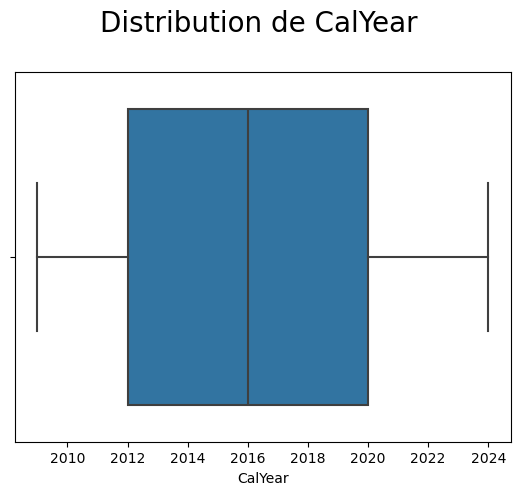


Statistiques de la variable:  HourOfCall

count    1.691360e+06
mean     1.347415e+01
std      6.246800e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.400000e+01
75%      1.900000e+01
max      2.300000e+01
Name: HourOfCall, dtype: float64



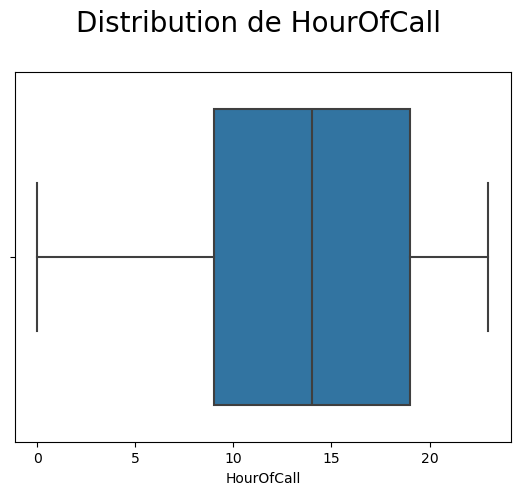


Statistiques de la variable:  Easting_rounded

count    1.691360e+06
mean     5.306637e+05
std      9.721261e+03
min      5.035500e+05
25%      5.252500e+05
50%      5.309500e+05
75%      5.362500e+05
max      6.111500e+05
Name: Easting_rounded, dtype: float64



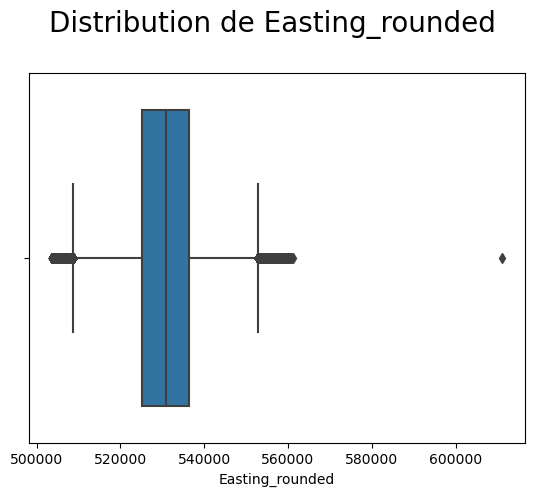


Statistiques de la variable:  Northing_rounded

count    1.691360e+06
mean     1.804959e+05
std      7.355623e+03
min      1.559500e+05
25%      1.761500e+05
50%      1.810500e+05
75%      1.851500e+05
max      3.024500e+05
Name: Northing_rounded, dtype: float64



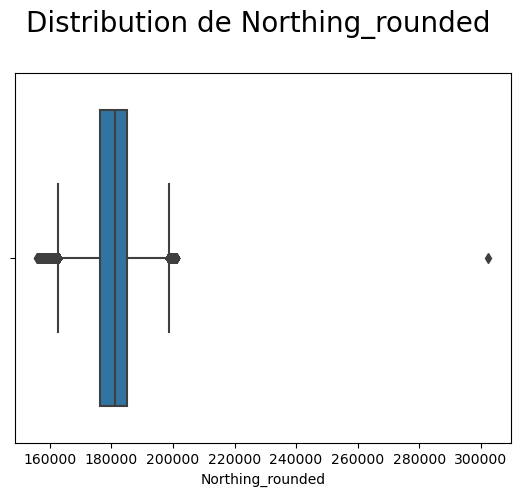


Statistiques de la variable:  FirstPumpArriving_AttendanceTime

count    1.691360e+06
mean     3.163317e+02
std      1.334618e+02
min      1.000000e+00
25%      2.360000e+02
50%      2.960000e+02
75%      3.690000e+02
max      1.200000e+03
Name: FirstPumpArriving_AttendanceTime, dtype: float64



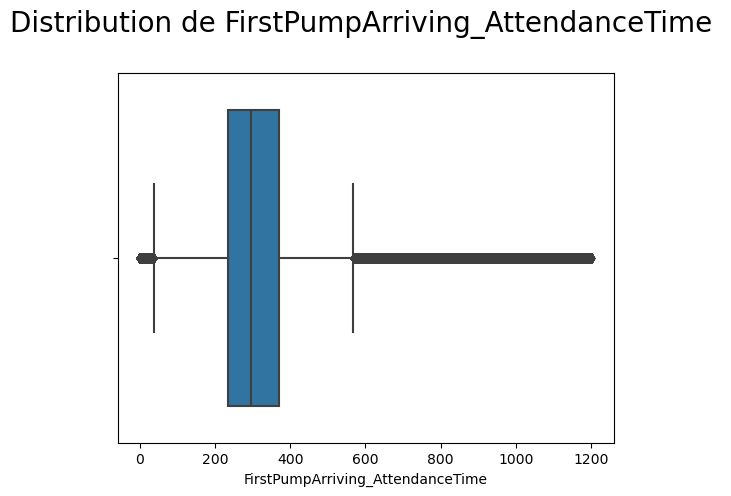


Statistiques de la variable:  NumStationsWithPumpsAttending

count    1.691360e+06
mean     1.364330e+00
std      6.755773e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.600000e+01
Name: NumStationsWithPumpsAttending, dtype: float64



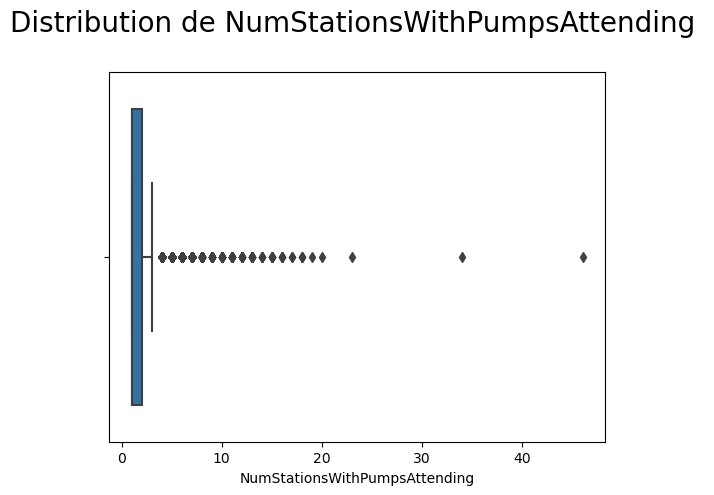


Statistiques de la variable:  NumPumpsAttending

count    1.691360e+06
mean     1.550219e+00
std      8.353861e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.060000e+02
Name: NumPumpsAttending, dtype: float64



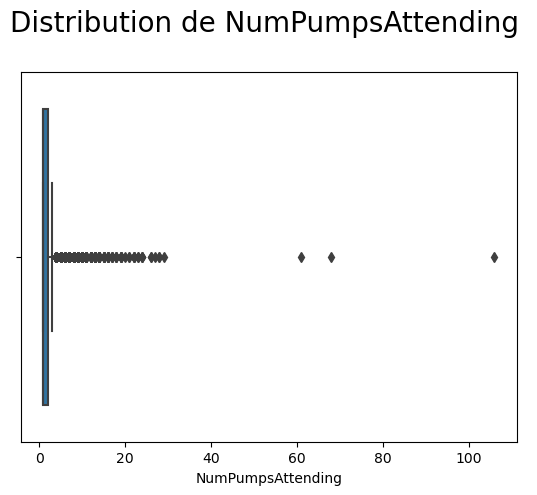


Statistiques de la variable:  PumpCount

count    1.691360e+06
mean     1.591759e+00
std      1.588199e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.510000e+02
Name: PumpCount, dtype: float64



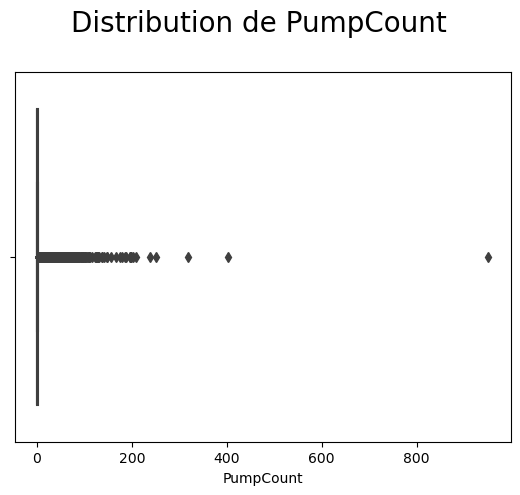


Statistiques de la variable:  PumpMinutesRounded

count    1.691360e+06
mean     7.632329e+01
std      5.765350e+02
min      6.000000e+01
25%      6.000000e+01
50%      6.000000e+01
75%      6.000000e+01
max      5.256290e+05
Name: PumpMinutesRounded, dtype: float64



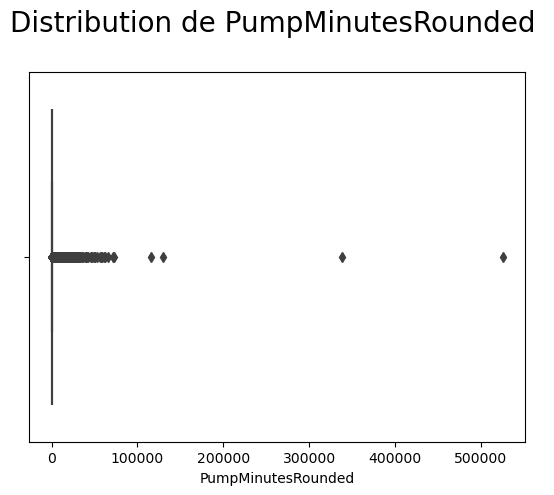


Statistiques de la variable:  Notional Cost (£)

count    1.691360e+06
mean     3.974396e+02
std      2.724156e+03
min      2.550000e+02
25%      2.600000e+02
50%      3.280000e+02
75%      3.520000e+02
max      2.277726e+06
Name: Notional Cost (£), dtype: float64



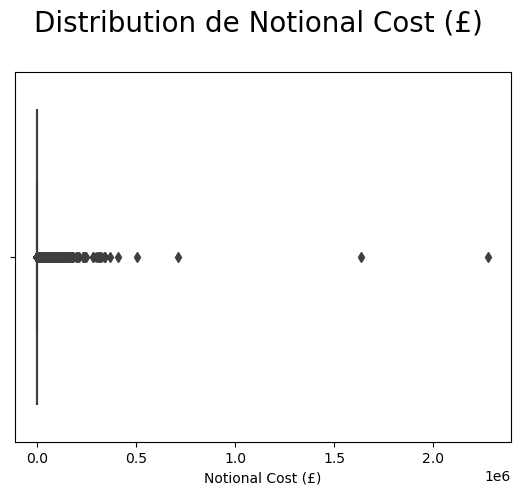


Statistiques de la variable:  NumCalls

count    1.691360e+06
mean     1.330506e+00
std      1.489110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.690000e+02
Name: NumCalls, dtype: float64



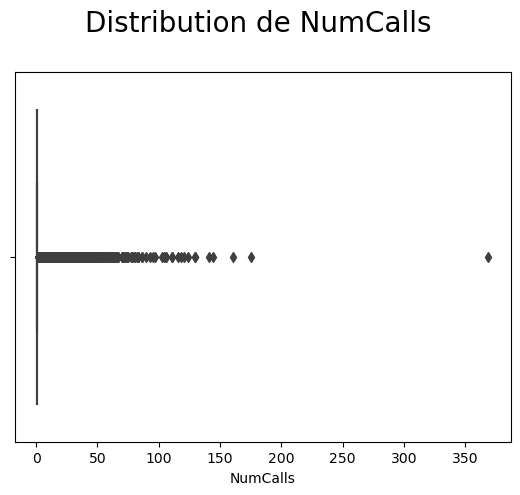

In [47]:
numeric_features = list(incidents_df.select_dtypes(include=np.number).columns)
numeric_features
for col in numeric_features:
    analyse_variable_quantitative(col, incidents_df)

**Check des outliers**

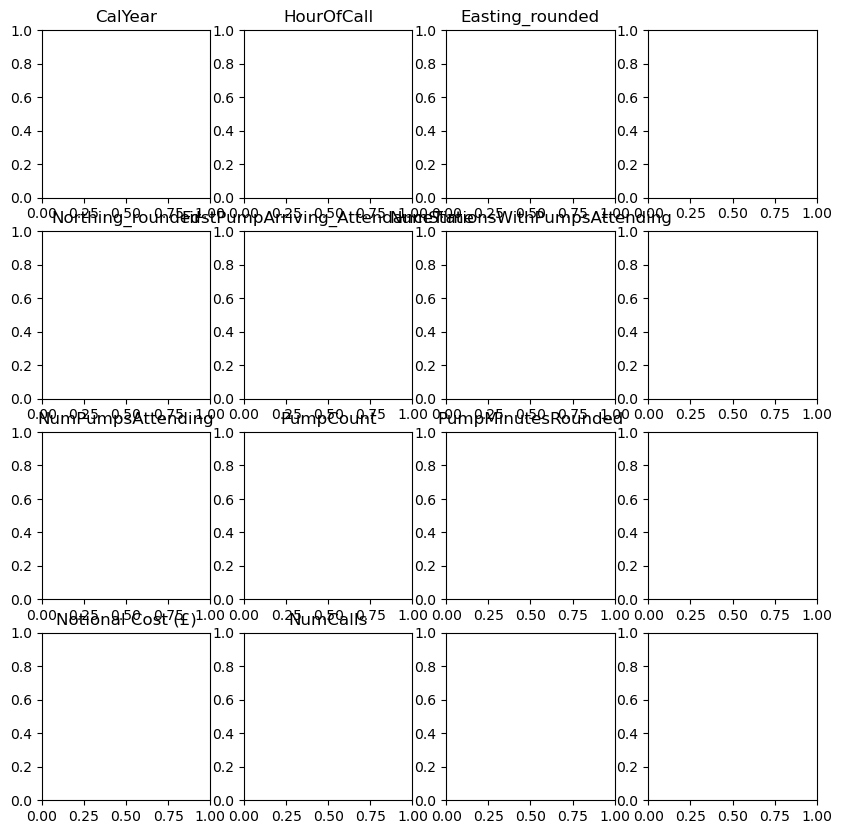

In [27]:
numeric_features = list(incidents_df.select_dtypes(include=np.number).columns)
#numeric_features.remove('target')
#categorical_features = list(data.select_dtypes("int8").columns)

fig,ax = plt.subplots(4,4,figsize=(10,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    #incidents_df[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

In [28]:
#for col in incidents_df.select_dtypes('float'):
#    plt.figure()
#    sns.displot(incidents_df[col])

In [29]:
#for col in incidents_df.select_dtypes(exclude='object'):
#    plt.figure()
#    sns.displot(incidents_df[col])

In [51]:
for col in incidents_df.select_dtypes('object'):
    print(f'{col :-<100} {incidents_df[col].unique()}')

IncidentNumber-------------------------------------------------------------------------------------- [235138081.0 1091.0 2091.0 ... '051572-31032024' '051573-31032024'
 '051574-31032024']
IncidentGroup--------------------------------------------------------------------------------------- ['Special Service' 'Fire' 'False Alarm']
StopCodeDescription--------------------------------------------------------------------------------- ['Special Service' 'Secondary Fire' 'AFA' 'Primary Fire'
 'False alarm - Good intent' 'False alarm - Malicious' 'Chimney Fire'
 'Flood call attended - Batch mobilised' 'Late Call'
 'Use of Special Operations Room']
PropertyCategory------------------------------------------------------------------------------------ ['Road Vehicle' 'Outdoor' 'Dwelling' 'Outdoor Structure'
 'Other Residential' 'Non Residential' 'Aircraft' 'Rail Vehicle' 'Boat']
PropertyType---------------------------------------------------------------------------------------- ['Car ' 'Lake/pond/res

#### 2.2.2 Lecture des données "Mobilisation"

In [31]:
## 1.1 Lecture des données "Mobilisation"


In [32]:
df1 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2009 - 2017.csv")

df1.sample(10)

C:\Users\courio\AppData\Local\Temp\ipykernel_3324\343694789.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2009 - 2017.csv")


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
850447,119522-04092016,04-Sep-16,2016,21:27:47,21,Special Service,Special Service,Flooding,Non Residential,Infant/Primary school,Within same building,HA1 1QQ,HA1,2.000003e+11,21201082.0,E09000015,HARROW,Harrow,E05013553,Marlborough,Marlborough,515100.0,188475.0,515150,188450,51.583391,-0.340139,London,Harrow,328.0,Harrow,NaN,NaN,1.0,1.0,1,60,326,1.0
704197,38706151.0,02-Apr-15,2015,02:34:08,2,False Alarm,AFA,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Within same building,NaN,NW10,0.000000e+00,20202016.0,E09000005,BRENT,Brent,E05013501,Harlesden & Kensal Green,Harlesden & Kensal Green,NaN,NaN,522150,183150,NaN,NaN,London,Willesden,1088.0,Park Royal,1102.0,Paddington,2.0,2.0,2,63,313,1.0
272228,22532111.0,14-Feb-11,2011,12:50:21,12,Special Service,Special Service,RTC,Road Vehicle,Car,In street outside gazetteer location,KT2 5JZ,KT2,NaN,NaN,E09000021,KINGSTON UPON THAMES,Kingston Upon thames,E05013937,Kingston Gate,Kingston Gate,519009.0,170640.0,519050,170650,51.422286,-0.289758,London,Kingston,290.0,Kingston,NaN,NaN,1.0,1.0,1,60,260,1.0
812332,053025-04052016,04-May-16,2016,21:29:00,21,Special Service,Special Service,Flooding,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,NaN,NW10,0.000000e+00,20200934.0,E09000005,BRENT,Brent,E05013517,Willesden Green,Willesden Green,NaN,NaN,523050,184650,NaN,NaN,London,Willesden,195.0,Willesden,NaN,NaN,1.0,1.0,1,60,326,1.0
123100,214402091.0,27-Nov-09,2009,22:32:37,22,Special Service,Special Service,Spills and Leaks (not RTC),Road Vehicle,Car,In street outside gazetteer location,E16 3PG,E16,NaN,NaN,E09000025,NEWHAM,Newham,E05013908,Custom House,Custom House,540578.0,181738.0,540550,181750,51.517079,0.024675,London,Plaistow,183.0,Plaistow,NaN,NaN,1.0,1.0,1,60,260,1.0
556284,128843131.0,15-Sep-13,2013,16:50:02,16,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,NaN,E5,0.000000e+00,20900939.0,E09000012,HACKNEY,Hackney,E05009380,Lea Bridge,Lea Bridge,NaN,NaN,535250,186650,NaN,NaN,London,Stoke Newington,NaN,NaN,NaN,NaN,1.0,1.0,1,60,290,1.0
597478,19823141.0,16-Feb-14,2014,17:25:44,17,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,SW16,0.000000e+00,21901431.0,E09000022,LAMBETH,Lambeth,E05014116,Streatham Wells,Streatham Wells,NaN,NaN,530950,172050,NaN,NaN,London,West Norwood,315.0,West Norwood,535.0,Mitcham,3.0,3.0,2,60,290,1.0
948901,110597-15082017,15-Aug-17,2017,22:33:27,22,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,NaN,N17,0.000000e+00,21103186.0,E09000014,HARINGEY,Haringey,E05013602,Tottenham Hale,Tottenham Hale,NaN,NaN,533950,189850,NaN,NaN,London,Tottenham,268.0,Tottenham,NaN,NaN,1.0,1.0,1,60,328,1.0
625191,69362141.0,03-Jun-14,2014,12:42:43,12,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,NaN,W6,0.000000e+00,21000797.0,E09000013,HAMMERSMITH AND FULHAM,Hammersmith And fulham,E05013733,Addison,Addison,NaN,NaN,523350,179550,NaN,NaN,London,Hammersmith,NaN,NaN,NaN,NaN,1.0,1.0,1,60,295,1.0
412383,63507121.0,08-May-12,2012,20:44:56,20,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street close to gazette

In [33]:
display(df1.columns)
print(len(df1.columns))

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

39


In [34]:
df2 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2018 onwards.csv", encoding='unicode_escape')

df2.sample(10)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
322678,021218-23022021,23-Feb-21,2021,21:02:50,21,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,In street outside gazetteer location,E14 0ED,E14,6.084692e+06,22700445,E09000030,TOWER HAMLETS,Tower Hamlets,E05009325,Lansbury,Lansbury,538041.0,181027.0,538050,181050,51.511319,-0.012135,London,Poplar,115.0,Poplar,260.0,Millwall,2.0,2.0,2,60,346,1.0
475813,094561-27062022,27-Jun-22,2022,15:40:04,15,Fire,Primary Fire,NaN,Non Residential,Other bulk storage,On land associated with building,TW7 5PR,TW7,2.000040e+11,21501215,E09000018,HOUNSLOW,Hounslow,E05013626,OSTERLEY & SPRING GROVE,OSTERLEY & SPRING GROVE,515467.0,178219.0,515450,178250,51.491142,-0.338197,London,Heston,593.0,Chiswick,571.0,Ealing,2.0,2.0,2,125,758,1.0
124199,030205-12032019,12-Mar-19,2019,15:55:33,15,Fire,Secondary Fire,NaN,Outdoor,Tree scrub,On land associated with building,EN4 8QB,EN4,2.001516e+08,20033840,E09000003,BARNET,Barnet,E05013635,East Barnet,East Barnet,527820.0,194899.0,527850,194850,51.638388,-0.154304,London,Barnet,346.0,Southgate,NaN,NaN,1.0,1.0,1,60,333,2.0
499120,141947-25082022,25-Aug-22,2022,9:43:53,9,False Alarm,AFA,NaN,Non Residential,Food and drink processing,Within same building,SW19 3XX,SW19,1.009203e+10,22103841,E09000024,MERTON,Merton,E05013810,ABBEY,ABBEY,526032.0,169704.0,526050,169750,51.412360,-0.189127,London,Wimbledon,408.0,Mitcham,NaN,NaN,1.0,1.0,1,60,364,1.0
451369,052623-14042022,14-Apr-22,2022,23:59:43,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,NaN,SW6,0.000000e+00,21000826,E09000013,HAMMERSMITH AND FULHAM,Hammersmith And fulham,E05013747,Sands End,Sands End,NaN,NaN,526250,176350,NaN,NaN,London,Fulham,286.0,Fulham,345.0,Chelsea,2.0,2.0,2,60,364,1.0
37608,061948-19052018,19-May-18,2018,7:31:23,7,Fire,Secondary Fire,NaN,Outdoor,Hedge,Open land/water - nearest gazetteer location,EN3 5TL,EN3,2.072021e+08,20707547,E09000010,ENFIELD,Enfield,E05013675,Bullsmoor,Bullsmoor,535230.0,199297.0,535250,199250,51.676178,-0.045586,London,Enfield,370.0,Enfield,NaN,NaN,1.0,1.0,1,60,333,1.0
424926,009133-20012022,20-Jan-22,2022,19:07:10,19,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,NW9,0.000000e+00,20010000,E09000003,BARNET,Barnet,E05013632,Colindale North,Colindale North,NaN,NaN,521650,190650,NaN,NaN,London,Mill Hill,337.0,Hendon,415.0,Mill Hill,4.0,5.0,5,370,2171,3.0
187612,138992-11102019,11-Oct-19,2019,23:00:56,23,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,Correct incident location,NaN,E12,0.000000e+00,22200183,E09000025,NEWHAM,Newham,E05013915,Little Ilford,Little Ilford,NaN,NaN,543150,186050,NaN,NaN,London,Ilford,245.0,Ilford,262.0,Ilford,4.0,5.0,5,192,1085,2.0
313804,007130-18012021,18-Jan-21,2021,22:17:56,22,Special Service,Special Service,No action (not false alarm),Dwelling,House - single occupancy,Correct incident location,NaN,N1,0.000000e+00,21604671,E09000019,ISLINGTON,Islington,E05013711,St. Peter's & Canalside,St. Peter's & Canalside,NaN,NaN,532150,183550,NaN,NaN,London,Islington,395.0,Islington,NaN,NaN,1.0,1.0,1,60,346,1.0
344002,056402-13052021,13-May-21,2021,7:10:13,7,False Alarm,AFA,NaN,Other Residential,Boarding House/B&B for homeless/asylum seekers,Within same building,W1T 4SG,W1T,5.093136e+06,20401062,E0900000

In [35]:
display(df2.columns)
print(len(df2.columns))

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

39


In [36]:
df_diff = pd.concat([df1,df2]).drop_duplicates(keep=False)